<h2 style="text-align: center;"><strong>Segment 2: Matrix Operations for Machine Learning</strong></h2>

* Singular Value Decomposition (SVD)
* The Moore-Penrose Pseudoinverse
* The Trace Operator
* Principal Component Analysis (PCA)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import tensorflow as tf

## **Singular Value Decomposition (SVD)**

**Singular Value Decomposition** *is a factorization of a matrix $A$ into three matrices.*

$A = UDV^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

##### **SVD in NumPy**

In [2]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [3]:
U, d, VT = np.linalg.svd(A)

*Left singular vectors*

In [4]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

*Singular values (stretch factors)*

In [5]:
d

array([8.66918448, 4.10429538])

*Right singular vectors transpose*

In [6]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [7]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

*For a non-square matrix $A \in \mathbb{R}^{m \times n}$, $D$ must be padded with zeros to shape $m \times n$ so that the multiplication $U D V^T$ is valid*

In [8]:
D = np.concatenate((np.diag(d), np.array([[0, 0]])), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

*Matrix Reconstruction Using SVD:* $A \approx U \, D \, V^T$

In [9]:
np.dot(U,np.dot(D,VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

##### **SVD in PyTorch**

In [10]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [11]:
U, S, VT = torch.linalg.svd(P)

*Left singular vectors*

In [12]:
U

tensor([[-0.9757, -0.1823, -0.1214],
        [-0.0975, -0.1350,  0.9860],
        [-0.1961,  0.9739,  0.1140]])

*Singular values (stretch factors)*

In [13]:
S

tensor([26.1632,  8.1875,  2.5395])

*Right singular vectors transpose*

In [14]:
VT

tensor([[-0.9810, -0.1196,  0.1528],
        [-0.0113,  0.8211,  0.5706],
        [ 0.1937, -0.5581,  0.8069]])

*Create diagonal matrix D from singular values S for reconstruction.*

In [15]:
D = torch.diag(S)
D

tensor([[26.1632,  0.0000,  0.0000],
        [ 0.0000,  8.1875,  0.0000],
        [ 0.0000,  0.0000,  2.5395]])

*Matrix Reconstruction Using SVD:* $A \approx U \, D \, V^T$

In [16]:
torch.matmul(U,torch.matmul(D,VT))

tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

##### **SVD in TensorFlow**

In [17]:
T = tf.constant([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
T

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[25.,  2., -5.],
       [ 3., -2.,  1.],
       [ 5.,  7.,  4.]], dtype=float32)>

**In TensorFlow’s SVD, singular values are returned first for efficiency and easy access in ML tasks.**

In [18]:
S, U, VT = tf.linalg.svd(T)

*Singular values (stretch factors)*

In [19]:
S

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([26.163233 ,  8.187547 ,  2.5395322], dtype=float32)>

*Left singular vectors*

In [20]:
U

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.9757195 , -0.1822729 , -0.1214413 ],
       [ 0.09750431, -0.13500924,  0.9860352 ],
       [ 0.19612318,  0.9739348 ,  0.11395877]], dtype=float32)>

*Right singular vectors transpose*

In [21]:
VT

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.98099935, -0.01125804,  0.193684  ],
       [ 0.1196065 ,  0.8211272 , -0.55807215],
       [-0.15275638,  0.5706342 ,  0.80687183]], dtype=float32)>

*Create diagonal matrix D from singular values S for reconstruction.*

In [22]:
D = tf.linalg.diag(S)
D

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[26.163233 ,  0.       ,  0.       ],
       [ 0.       ,  8.187547 ,  0.       ],
       [ 0.       ,  0.       ,  2.5395322]], dtype=float32)>

*Matrix Reconstruction Using SVD:* $A \approx U \, D \, V^T$

In [23]:
tf.matmul(U,tf.matmul(D,VT))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[24.911543  , -1.6888049 ,  5.528367  ],
       [ 1.9878321 ,  0.49251783,  3.1314454 ],
       [ 5.9432707 ,  6.6551557 , -3.222799  ]], dtype=float32)>

> SVD and eigendecomposition are closely related.

* The **left-singular vectors** of $A$ are the eigenvectors of $AA^T$.
* The **right-singular vectors** of $A$ are the eigenvectors of $A^TA$.
* The **non-zero singular values** of $A$ are the square roots of the eigenvalues of $AA^T$ (or equivalently, of $A^TA$).

### **Image Compression via SVD**

*Applied* **Singular Value Decomposition (SVD)** *to an image of one of my favorite places*, Fairy Meadows, with **Nanga Parbat** in the background, *to analyze and compress its visual features.*

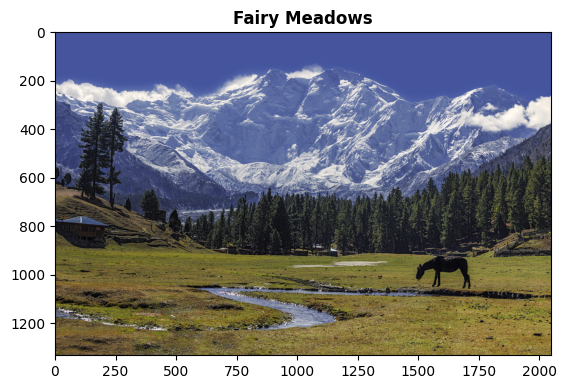

In [24]:
from PIL import Image

img = Image.open('fairy-meadows.jpg')
plt.imshow(img)
_ = plt.title(label="Fairy Meadows", fontweight="bold")

*Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels*

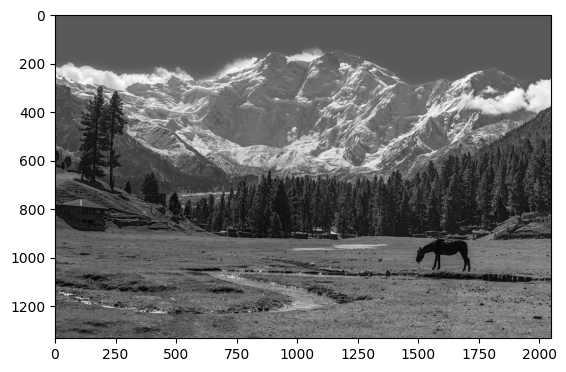

In [25]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

*Convert the image’s **L** channel into a NumPy array of floats; this does not alter the original image content.*

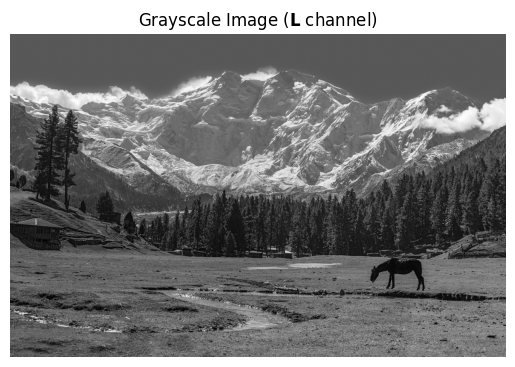

In [26]:
img_matrix = np.array(imggray.getchannel(0), dtype=float)

plt.imshow(img_matrix, cmap='gray', vmin=0, vmax=255)
plt.title(r"Grayscale Image ($\mathbf{L}$ channel)")
plt.axis('off')
plt.show()

*Calculate SVD of the image*

In [27]:
U, S, V = np.linalg.svd(img_matrix)

> Just as eigenvalues in $\text{diag}(\lambda)$ are ordered from largest to smallest, singular values in $D$ (or $\text{diag}(\sigma)$ in this code) are also arranged in descending order. This ordering reflects the importance of each component: the largest singular values correspond to the directions that capture the most significant patterns in the image. Consequently, the first left-singular vector of $U$ & the first right-singular vector of $V$ represent the most dominant features or structures, while the smaller singular values and their vectors capture finer details or noise.

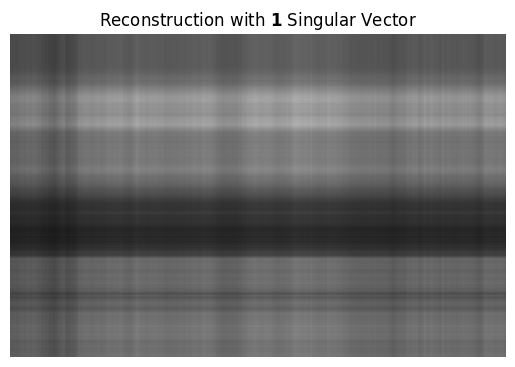

In [28]:
reconstruct_img = np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(V[:1, :])

plt.imshow(reconstruct_img, cmap='gray', vmin=0, vmax=255)
plt.title(rf"Reconstruction with $\mathbf{{1}}$ Singular Vector")
plt.axis('off')
plt.show()

> The number of singular vectors used for reconstruction can be adjusted to balance compression and image quality. In this demonstration, singular vectors are progressively included, starting from a small subset and increasing up to 128, to illustrate how the reconstruction improves as more vectors are utilized.

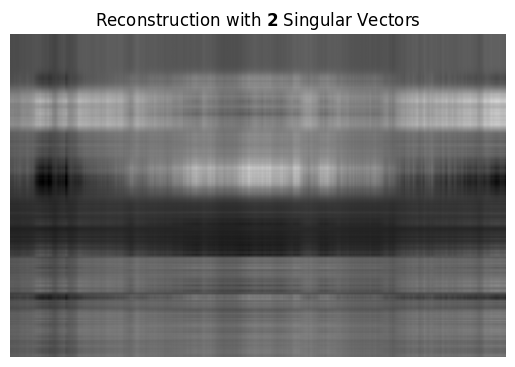

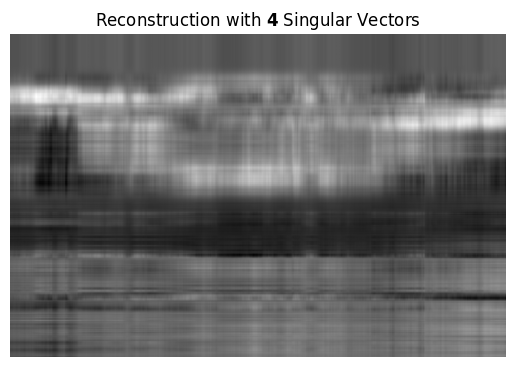

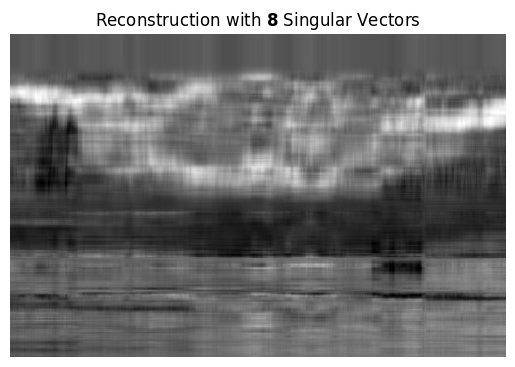

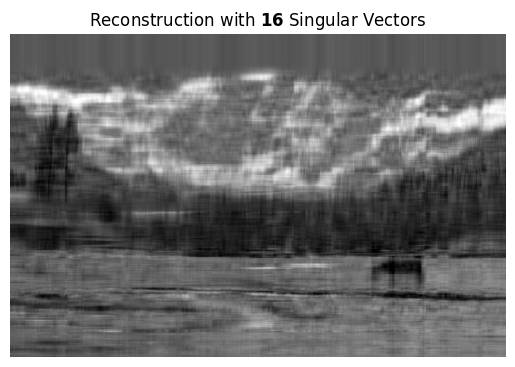

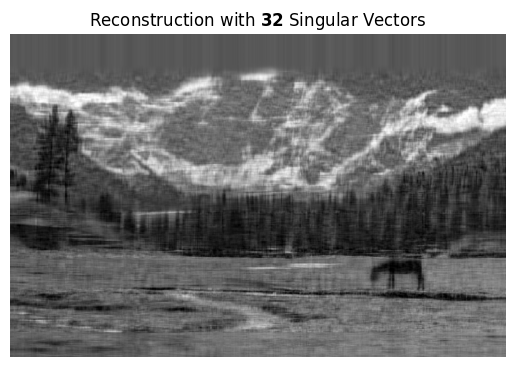

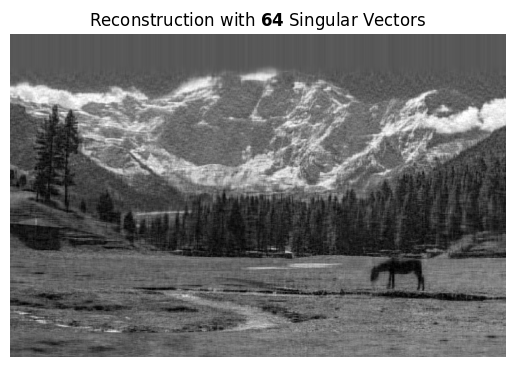

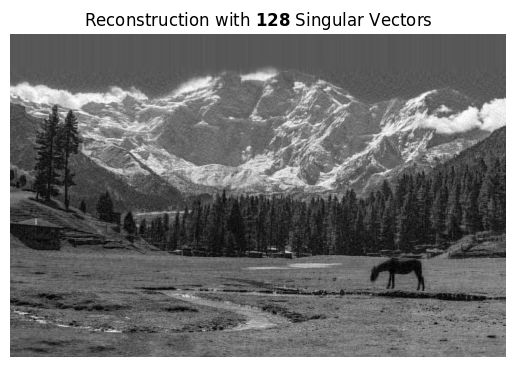

In [29]:
for i in [2, 4, 8, 16, 32, 64, 128]:

    reconstruct_img = U[:, :i] @ np.diag(S[:i]) @ V[:i, :]

    plt.imshow(reconstruct_img, cmap='gray', vmin=0, vmax=255)
    plt.title(rf"Reconstruction with $\mathbf{{{i}}}$ Singular Vectors")
    plt.axis('off')
    plt.show()

> With 128 singular vectors, the image is effectively reconstructed, yet its data footprint is much smaller than the original. Let’s calculate the percentage reduction in size as well as how many times larger the original image is compared to the compressed representation.

*Image Dimensions*

In [30]:
img_matrix.shape

(1334, 2048)

*The image’s full representation contains* **2,732,032** *pixels (1334 × 2048).*

In [31]:
full_representation = 1334*2048
full_representation

2732032

**Storage Requirement for 128-Singular-Vector Representation**

*The 128-singular-vector representation requires only* **432,024** *elements, significantly reducing the data footprint compared to the original 2,732,032-element image while retaining most of the image’s essential features.*

In [32]:
svd128_representation = (128*1334) + 128 + (128*2048)
svd128_representation

433024

*By representing the image using 128 singular vectors, its size is reduced to only* **15.85%** *of the original. Singular vectors can similarly enable significant, lossy compression for various other types of media.*

In [33]:
fraction = svd128_representation / full_representation
percentage = fraction * 100
print(f"{percentage:.2f}%")

15.85%


*The original image is about* **6.3×** *the size of the compressed 128-singular-vector representation.*

In [34]:
size_ratio = full_representation / svd128_representation
print(f"Size ratio: {size_ratio:.2f}x")

Size ratio: 6.31x


---

## **The Moore-Penrose Pseudoinverse**

The **pseudoinverse** $A^+$ of a matrix $A$ is a generalization of the inverse that exists **even for non-square or singular matrices**. It provides a solution to linear systems $Ax = b$, including cases where an exact inverse does not exist.  

Using the **singular value decomposition (SVD)**, the pseudoinverse is computed as:

$$
A^+ = V D^+ U^T
$$

where:  

- $A = U D V^T$ is the SVD of $A$, with  
  - $U$ containing the **left singular vectors**,  
  - $D$ a diagonal matrix of **singular values**, and  
  - $V$ containing the **right singular vectors**.  
- $D^+$ is the **pseudoinverse of $D$**, obtained by taking the reciprocal of each non-zero singular value while keeping zeros as zeros.  
- The shape of $D^+$ is transposed relative to $D$, ensuring the multiplication $V D^+ U^T$ is valid.  

**Key Concept:**  
- The pseudoinverse provides the **minimum-norm solution** to $Ax = b$, even when $A$ is not square or singular.

##### **Pseudoinverse in NumPy**

In [35]:
A_np = np.array([[-1,2],[3,-2],[5,7]])
A_np

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

*Perform singular value decomposition (SVD) of the matrix A_np to obtain its singular values and singular vectors.*

In [36]:
U, S, VT = np.linalg.svd(A_np, full_matrices=False)

*Left singular vectors*

In [37]:
U

array([[ 0.12708324,  0.47409506],
       [ 0.00164602, -0.87847553],
       [ 0.99189069, -0.0592843 ]])

*Singular values*

In [38]:
S

array([8.66918448, 4.10429538])

*Right singular vectors (Transposed)*

In [39]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

*Small threshold to safely ignore near-zero singular values.*

In [40]:
tolerance = 1e-10

*Diagonal matrix of reciprocals of non-zero singular values, used to compute the pseudoinverse.*

In [41]:
S_plus = np.diag([1/s if s > tolerance else 0.0 for s in S])

*Computes the Moore–Penrose pseudoinverse of the matrix using its SVD.*

In [42]:
VT.T @ S_plus @ U.T

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

> Working through this derivation is valuable for understanding how the Moore–Penrose pseudoinverse is constructed. However, NumPy already provides a built-in function, **pinv()**, that computes it directly.

In [43]:
np.linalg.pinv(A_np)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

##### **Pseudoinverse in PyTorch**

In [44]:
A_pt = torch.tensor([[-1, 2], [3, -2], [5, 7]], dtype=torch.float32)
A_pt

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

*Perform singular value decomposition (SVD) of the matrix A_pt to obtain its singular values and singular vectors.*

In [45]:
U, S, VT = torch.linalg.svd(A_pt, full_matrices=False)

*Left singular values*

In [46]:
U

tensor([[ 0.1271,  0.4741],
        [ 0.0016, -0.8785],
        [ 0.9919, -0.0593]])

*Singular Values*

In [47]:
S

tensor([8.6692, 4.1043])

*Right singular vectors (Transposed)*

In [48]:
VT

tensor([[ 0.5580,  0.8298],
        [-0.8298,  0.5580]])

*Small threshold to safely ignore near-zero singular values.*

In [49]:
tolerance = 1e-10

*Diagonal matrix of reciprocals of non-zero singular values, used to compute the pseudoinverse.*

In [50]:
Splus = torch.diag(torch.where(S > tolerance, 1.0 / S, torch.tensor(0.0, dtype=S.dtype)))
Splus

tensor([[0.1154, 0.0000],
        [0.0000, 0.2436]])

*Computes the Moore–Penrose pseudoinverse of the matrix using its SVD.*

In [51]:
VT.T @ Splus @ U.T

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

> PyTorch also provides a direct function for the pseudoinverse, just like NumPy.

In [52]:
torch.pinverse(A_pt)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

##### **Pseudoinverse in TensorFlow**

In [53]:
A_tf = tf.constant([[-1, 2], [3, -2], [5, 7]], dtype=tf.float32)
A_tf

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]], dtype=float32)>

*Perform singular value decomposition (SVD) of the matrix A_tf to obtain its singular values and singular vectors.*

In [54]:
S, U, V = tf.linalg.svd(A_tf, full_matrices=False)

*Singular values*

In [55]:
S

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([8.669184, 4.104295], dtype=float32)>

*Left singular vectors*

In [56]:
U

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.12708327, -0.47409505],
       [ 0.00164604,  0.8784756 ],
       [ 0.9918907 ,  0.05928418]], dtype=float32)>

*Right singular vectors*  
> In TensorFlow, returned as **V** (not transposed)

In [57]:
V

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.5579889,  0.8298484],
       [ 0.8298484, -0.5579889]], dtype=float32)>

*Small threshold to safely ignore near-zero singular values.*

In [58]:
tolerance = 1e-10

*Diagonal matrix of reciprocals of non-zero singular values, used to compute the pseudoinverse.*

In [59]:
S_plus = tf.linalg.diag(tf.where(S > tolerance, 1.0 / S, 0.0))
S_plus

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.11535111, 0.        ],
       [0.        , 0.24364722]], dtype=float32)>

*Computes the Moore–Penrose pseudoinverse of the matrix using its SVD.*

In [60]:
tf.matmul(tf.matmul(V, S_plus), tf.transpose(U))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.08767772,  0.17772515,  0.07582936],
       [ 0.07661929, -0.11927334,  0.08688785]], dtype=float32)>

> TensorFlow also provides a direct function for the pseudoinverse, just like NumPy and PyTorch.

In [61]:
tf.linalg.pinv(A_tf)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.08767772,  0.17772515,  0.07582937],
       [ 0.07661929, -0.11927334,  0.08688786]], dtype=float32)>

### **Regression with the Pseudoinverse**

For regression problems, the number of **observations ($n$, rows of $X$)** is typically **greater than the number of features (columns of $X$)**. This creates an **overdetermined system**, where it is generally impossible to satisfy all equations exactly, so we look for the **best approximate solution** in a **least-squares sense**.

We can illustrate this with a small example using our **clinical trial dataset** with **eight data points ($n = 8$)** and a single feature (drug dosage):

$$
x_1 = [0, 1, 2, 3, 4, 5, 6, 7], \quad
y = [1.86, 1.31, 0.62, 0.33, 0.09, -0.67, -1.23, -1.37]
$$

To perform linear regression, we first build a **design matrix $X$** by adding a column of ones for the intercept term $b$:

$$
X = 
\begin{bmatrix}
1 & 0 \\
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5 \\
1 & 6 \\
1 & 7
\end{bmatrix}
$$

We then compute the **regression coefficients** (intercept $b$ and slope $m$) using the **pseudoinverse**:

$$
w = 
\begin{bmatrix} b \\ m \end{bmatrix} 
= X^+ y
$$

Finally, the predicted values for the regression line are calculated as:

$$
\hat{y} = m x_1 + b
$$

This approach finds the **best-fitting line** through the eight data points in a **least-squares sense**, minimizing the overall error between the predicted $\hat{y}$ and the observed $y$.

##### **Linear Regression on Clinical Trial Data using Pseudoinverse**

$x1$ *represents the **dosage levels of a drug** administered to patients in a study on Alzheimer's disease.*

In [62]:
x1 = np.array([0, 1, 2, 3, 4, 5, 6, 7])
x1

array([0, 1, 2, 3, 4, 5, 6, 7])

$y$ *represents the patients forgetfulness scores corresponding to each drug dosage.*

In [63]:
y = np.array([1.86, 1.31, 0.62, 0.33, 0.09, -0.67, -1.23, -1.37])
y

array([ 1.86,  1.31,  0.62,  0.33,  0.09, -0.67, -1.23, -1.37])

*Build design matrix for regression*

`Add intercept column`

In [64]:
X = np.column_stack((np.ones(len(x1)), x1))
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

*Compute regression coefficients using pseudoinverse*

In [65]:
w = np.linalg.pinv(X) @ y
w

array([ 1.76      , -0.46928571])

In [66]:
b, m = w[0], w[1]

In [67]:
b

np.float64(1.7599999999999985)

In [68]:
m

np.float64(-0.469285714285714)

*Compute predicted values for regression line*

In [69]:
y_pred = m * x1 + b
y_pred

array([ 1.76      ,  1.29071429,  0.82142857,  0.35214286, -0.11714286,
       -0.58642857, -1.05571429, -1.525     ])

**Plot data points and regression line**

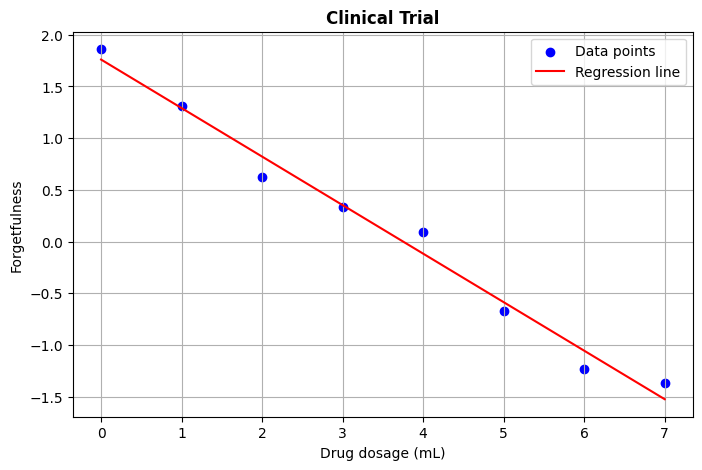

In [70]:
plt.figure(figsize=(8,5))
plt.scatter(x1, y, color='blue', label='Data points')  # Original data
plt.plot(x1, y_pred, color='red', label='Regression line')  # Regression line

plt.title('Clinical Trial', fontweight='bold')
plt.xlabel('Drug dosage (mL)')
plt.ylabel('Forgetfulness')
plt.legend()
plt.grid(True)
plt.show()

---

## **The Trace Operator**

*The trace of a matrix $A$, denoted as $\mathrm{Tr}(A)$, is defined as the sum of its diagonal elements.* $$\sum_i A_{i,i}$$
The trace operator has several useful properties that simplify linear algebra manipulations :

* $\mathrm{Tr}(A) = \mathrm{Tr}(A^T)$  
* Assuming compatible dimensions: $\mathrm{Tr}(ABC) = \mathrm{Tr}(CAB) = \mathrm{Tr}(BCA)$  

##### **Trace Operator in NumPy**

In [71]:
A_np

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [72]:
np.trace(A_np)

np.int64(-3)

*The Frobenius norm can be computed efficiently using the trace operator* : $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

*Frobenius Norm of `A_np`*

In [73]:
np.linalg.norm(A_np, ord="fro")

np.float64(9.591663046625438)

*Let's calculate Frobenius Norm using Trace Operator*

In [74]:
T_np = A_np @ A_np.T
T_np

array([[ 5, -7,  9],
       [-7, 13,  1],
       [ 9,  1, 74]])

In [75]:
np.sqrt(np.trace(T_np))

np.float64(9.591663046625438)

##### **Trace Operator in PyTorch**

In [76]:
A_pt

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [77]:
torch.trace(A_pt)

tensor(-3.)

*The Frobenius norm can be computed efficiently using the trace operator* : $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

*Frobenius Norm of `A_pt`*

In [78]:
torch.frobenius_norm(A_pt, dim=(0,1))

C:\Users\muham\AppData\Local\Temp\ipykernel_15848\406282243.py:1: UserWarning: at::frobenius_norm is deprecated and it is just left for JIT compatibility. It will be removed in a future PyTorch release. Please use `linalg.vector_norm(A, 2., dim, keepdim)` instead (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\LinearAlgebra.cpp:3072.)
  torch.frobenius_norm(A_pt, dim=(0,1))


tensor(9.5917)

*Let's calculate Frobenius Norm using Trace Operator*

In [79]:
T_pt = A_pt @ A_pt.T
T_pt

tensor([[ 5., -7.,  9.],
        [-7., 13.,  1.],
        [ 9.,  1., 74.]])

In [80]:
torch.sqrt(torch.trace(T_pt))

tensor(9.5917)

---

## **Principal Component Analysis (PCA)**

**Principal Component Analysis** is a statistical technique used for **dimensionality reduction**, aiming to retain as much of the **variance** in the data as possible.  

PCA works by:

1. Identifying a new set of **orthogonal axes** (called **principal components**) that capture the maximum variance in the data.
2. Projecting the original data onto these axes to reduce dimensionality while preserving the most important information.
3. Ordering the components according to the amount of variance they explain, so that the first component captures the most variance, the second captures the next most, and so on.

**Key applications of PCA:**

- Reducing high-dimensional datasets for visualization or computational efficiency.
- Noise reduction and feature extraction.
- Revealing patterns, correlations, or structure in the data.

**Mathematical formulation:**

Given a centered data matrix $X \in \mathbb{R}^{n \times d}$:

1. Compute the **covariance matrix**:  
$$
\Sigma = \frac{1}{n} X^\mathrm{T} X
$$

2. Perform **eigendecomposition** of $\Sigma$:  
$$
\Sigma = Q \Lambda Q^\mathrm{T}
$$  
where columns of $Q$ are the **principal components**, and $\Lambda$ contains the **variances** along each component.

3. Project the data onto the top $k$ principal components to reduce dimensionality:  
$$
X_\text{reduced} = X Q_k
$$

##### **PCA on the Iris Dataset with Visualization**

In [81]:
from sklearn.decomposition import PCA
from sklearn import datasets

*Load the Iris dataset*

In [82]:
iris = datasets.load_iris()

*Check the shape of the data (number of samples x features)*

In [83]:
iris.data.shape

(150, 4)

*Get the names of the features*

In [84]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

*Inspect the first 6 rows of the dataset*

In [85]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

*Initialize PCA to reduce the dataset to 2 principal components*

In [86]:
pca = PCA(n_components=2)

*Fit PCA on the Iris data and transform it into 2D*

In [87]:
X = pca.fit_transform(iris.data)

*Check the shape of the transformed data*

In [88]:
X.shape

(150, 2)

*Inspect the first 6 rows of the transformed data*

In [89]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

**Plot the 2D projection of the data (scatter plot)**

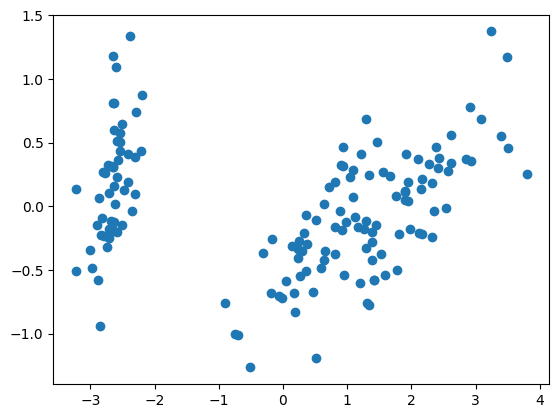

In [97]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

*Check the shape of target labels*

In [91]:
iris.target.shape

(150,)

*Inspect the first 6 target labels*

In [92]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

*Count unique target classes and their occurrences*

In [93]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

*List the target class names*

In [94]:
list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

**Scatter plot of the PCA-transformed data colored by target class**

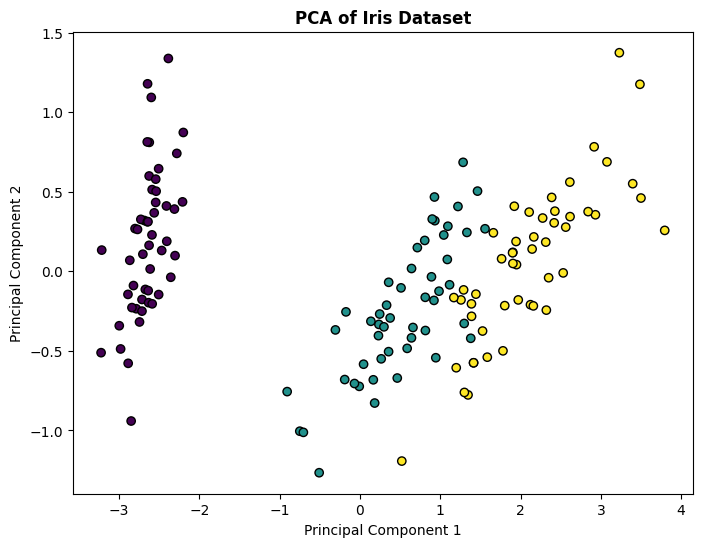

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset',fontweight="bold")

plt.show()

---